In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing # normalization
from statsmodels.formula.api import ols #linear regression from statsmodels
import statsmodels.api as sm #statsmodels library
from sklearn.linear_model import LinearRegression #linear regression from sklearn
from sklearn.metrics import mean_squared_error, r2_score #metrics for linear model
from sklearn.neighbors import KNeighborsClassifier as knnc #knn classifier
from sklearn.naive_bayes import GaussianNB as gnb #naive bayes classifier
from sklearn.model_selection import cross_val_score #cross validation score
from sklearn.model_selection import train_test_split #train test split function
from sklearn.metrics import accuracy_score, confusion_matrix #metrics for classification models
import scipy.stats as stats #for plotting q-q plot
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

# IMPORT DATA

In [669]:
beer= pd.read_csv('beer_profile_and_ratings.csv')

In [670]:
pd.set_option('display.max_columns', None)
beer.head(3)

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min_IBU,Max_IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,9,47,74,33,0,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,18,33,55,16,0,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,6,42,43,11,0,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377


# Descriptive Analysis

In [4]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3197 non-null   object 
 1   Style              3197 non-null   object 
 2   Brewery            3197 non-null   object 
 3   Beer Name (Full)   3197 non-null   object 
 4   Description        3197 non-null   object 
 5   ABV                3197 non-null   float64
 6   Min_IBU            3197 non-null   int64  
 7   Max_IBU            3197 non-null   int64  
 8   Astringency        3197 non-null   int64  
 9   Body               3197 non-null   int64  
 10  Alcohol            3197 non-null   int64  
 11  Bitter             3197 non-null   int64  
 12  Sweet              3197 non-null   int64  
 13  Sour               3197 non-null   int64  
 14  Salty              3197 non-null   int64  
 15  Fruits             3197 non-null   int64  
 16  Hoppy              3197 

In [5]:
beer.describe()

,ABV,Min_IBU,Max_IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
count,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000
mean,6.526688,21.180482,38.986863,16.515796,46.129496,17.055990,36.364404,58.270879,33.145449,1.017204,38.529559,40.924617,18.345637,75.330935,3.638789,3.754393,3.660428,3.702496,3.747522,233.284955
std,2.546997,13.242242,21.355281,10.410661,25.947842,17.331334,25.791152,34.281310,35.780172,2.132651,32.296646,30.403641,23.756582,39.909338,0.503209,0.403416,0.449937,0.510361,0.444288,361.811847
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.509615,1.571429,1.285714,1.214286,1.136364,1.000000
25%,5.000000,15.000000,25.000000,9.000000,29.000000,6.000000,17.000000,33.000000,11.000000,0.000000,12.000000,18.000000,4.000000,45.000000,3.422559,3.604651,3.470021,3.500000,3.566667,23.000000
50%,6.000000,20.000000,35.000000,14.000000,40.000000,11.000000,31.000000,54.000000,22.000000,0.000000,29.000000,33.000000,10.000000,73.000000,3.720183,3.833333,3.741667,3.791667,3.830239,93.000000
75%,7.600000,25.000000,45.000000,21.000000,58.000000,22.000000,52.000000,77.000000,42.000000,1.000000,60.000000,56.000000,23.000000,103.000000,3.978000,4.000000,3.965587,4.033333,4.032847,284.000000
max,57.500000,65.000000,100.000000,81.000000,175.000000,139.000000,150.000000,263.000000,284.000000,48.000000,175.000000,172.000000,184.000000,239.000000,5.000000,4.666667,5.000000,5.000000,5.000000,3290.000000


Next you can also see the categorical variables

In [6]:
##include the "include='all'" parameter to also show categorical variables
beer.describe(include="all")

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min_IBU,Max_IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
count,3197,3197,3197,3197,3197,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,...,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000
unique,3066,111,934,3197,1841,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Oktoberfest,Lager - Adjunct,Boston Beer Company (Samuel Adams),Alaskan Brewing Co. Alaskan Amber,Notes:,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,12,45,40,1,1347,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,6.526688,21.180482,38.986863,16.515796,46.129496,...,38.529559,40.924617,18.345637,75.330935,3.638789,3.754393,3.660428,3.702496,3.747522,233.284955
std,NaN,NaN,NaN,NaN,NaN,2.546997,13.242242,21.355281,10.410661,25.947842,...,32.296646,30.403641,23.756582,39.909338,0.503209,0.403416,0.449937,0.510361,0.444288,361.811847
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.509615,1.571429,1.285714,1.214286,1.136364,1.000000
25%,NaN,NaN,NaN,NaN,NaN,5.000000,15.000000,25.000000,9.000000,29.000000,...,12.000000,18.000000,4.000000,45.000000,3.422559,3.604651,3.470021,3.500000,3.566667,23.000000
50%,NaN,NaN,NaN,NaN,NaN,6.000000,20.000000,35.000000,14.000000,40.000000,...,29.000000,33.000000,10.000000,73.000000,3.720183,3.833333,3.741667,3.791667,3.830239,93.000000
75%,NaN,NaN,NaN,NaN,NaN,7.600000,25.000000,45.000000,21.000000,58.000000,...,60.000000,56.000000,23.000000,103.000000,3.978000,4.000000,3.965587,4.033333,4.032847,284.000000


In [7]:
beer.isnull().sum()

Name                 0
Style                0
Brewery              0
Beer Name (Full)     0
Description          0
ABV                  0
Min_IBU              0
Max_IBU              0
Astringency          0
Body                 0
Alcohol              0
Bitter               0
Sweet                0
Sour                 0
Salty                0
Fruits               0
Hoppy                0
Spices               0
Malty                0
review_aroma         0
review_appearance    0
review_palate        0
review_taste         0
review_overall       0
number_of_reviews    0
dtype: int64

In [8]:
beer.duplicated().sum()

0

<AxesSubplot:>

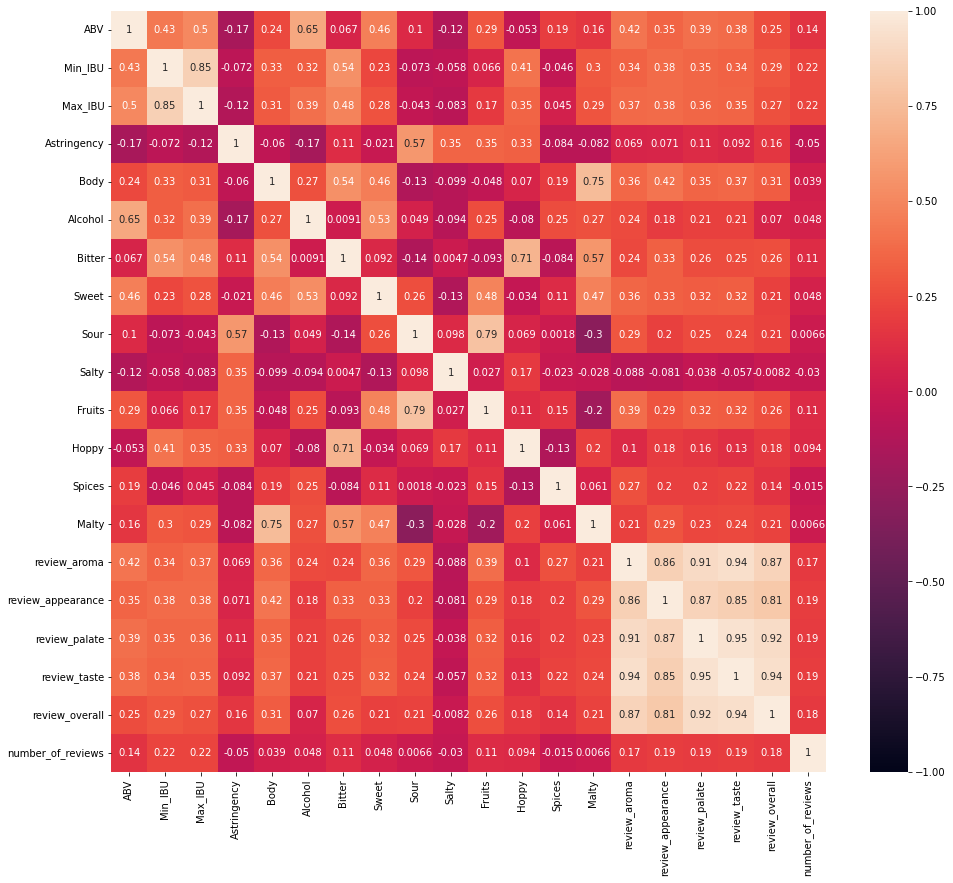

In [9]:
plt.figure(figsize=(16,14))
sns.heatmap(beer.corr(),vmin=-1,vmax=1,annot=True)

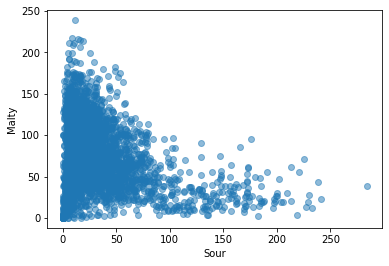

In [10]:
plt.scatter(beer['Sour'],beer['Malty'],alpha=0.5)
plt.xlabel('Sour')
plt.ylabel('Malty')
plt.show()

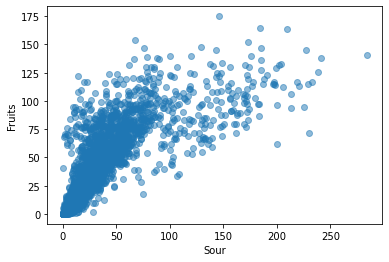

In [11]:
plt.scatter(beer['Sour'],beer['Fruits'],alpha=0.5)
plt.xlabel('Sour')
plt.ylabel('Fruits')
plt.show()

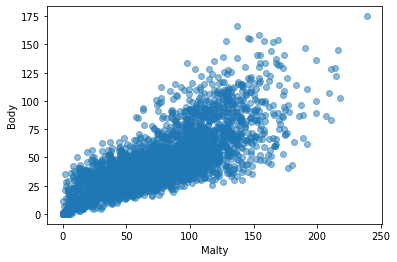

In [12]:
plt.scatter(beer['Malty'],beer['Body'],alpha=0.5)
plt.xlabel('Malty')
plt.ylabel('Body')
plt.show()

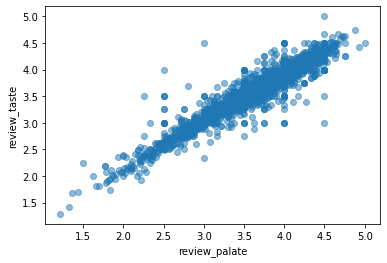

In [13]:
plt.scatter(beer['review_taste'],beer['review_palate'],alpha=0.5)
plt.xlabel('review_palate')
plt.ylabel('review_taste')
plt.show()

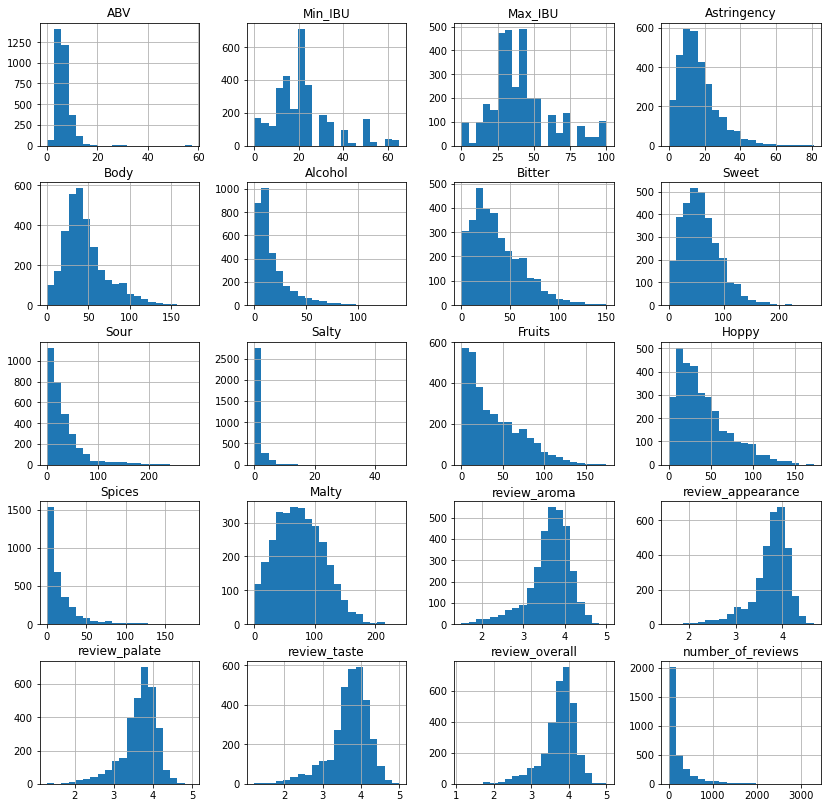

In [14]:
beer.hist(figsize=(14,14), bins=20)
plt.show()

## Transform 'Style' into dummy variables

In [15]:
#style is a "compound" varaible, need to extract the first part of the strings before getting dummies variables
beer['Style'].value_counts()

Lager - Adjunct                    45
Lager - European Pale              43
Wheat Beer - Hefeweizen            42
Stout - Irish Dry                  42
Lambic - Fruit                     42
                                   ..
Bière de Champagne / Bière Brut     8
Lager - India Pale Lager (IPL)      6
IPA - New England                   4
Brett Beer                          3
Sour - Gose                         3
Name: Style, Length: 111, dtype: int64

In [16]:
beer['Style Group']=beer['Style'].apply(lambda x: x.split('-')[0])
beer = beer.drop(['Style'], axis=1)

In [17]:
beer['Style Group'].value_counts()

Lager                              567
Stout                              254
Wheat Beer                         206
Porter                             164
IPA                                163
Bock                               155
Strong Ale                         148
Lambic                             100
Pale Ale                            98
Brown Ale                           94
Red Ale                             90
Pilsner                             86
Bitter                              74
Farmhouse Ale                       72
Blonde Ale                          64
Barleywine                          64
Sour                                57
Mild Ale                            47
Dubbel                              41
Winter Warmer                       40
Altbier                             39
Fruit and Field Beer                37
Tripel                              37
Scotch Ale / Wee Heavy              35
Scottish Ale                        34
Old Ale                  

In [18]:
dummies = pd.get_dummies(beer['Style Group'])
beer = pd.concat([beer, dummies], axis=1)

In [19]:
beer

,Name,Brewery,Beer Name (Full),Description,ABV,Min_IBU,Max_IBU,Astringency,Body,Alcohol,...,Scotch Ale / Wee Heavy,Scottish Ale,Smoked Beer,Sour,Stout,Strong Ale,Tripel,Wheat Beer,Wild Ale,Winter Warmer
0,Amber,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,9,...,0,0,0,0,0,0,0,0,0,0
1,Double Bag,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,18,...,0,0,0,0,0,0,0,0,0,0
2,Long Trail Ale,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,6,...,0,0,0,0,0,0,0,0,0,0
3,Doppelsticke,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.5,25,50,13,55,31,...,0,0,0,0,0,0,0,0,0,0
4,Sleigh'r Dark Doüble Alt Ale,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,25,50,25,51,26,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,Winter Shredder,Cisco Brewers Inc.,Cisco Brewers Inc. Winter Shredder,Notes:,8.8,35,50,15,37,24,...,0,0,0,0,0,0,0,0,0,1
3193,The First Snow Ale,RJ Rockers Brewing Company,RJ Rockers Brewing Company First Snow Ale,Notes:This hearty American pale ale contains a...,6.0,35,50,15,31,23,...,0,0,0,0,0,0,0,0,0,1
3194,Red Nose Winter Ale,Natty Greene's Pub & Brewing Co.,Natty Greene's Pub & Brewing Co. Red Nose Wint...,Notes:,6.8,35,50,8,44,24,...,0,0,0,0,0,0,0,0,0,1
3195,Fish Tale Winterfish,Fish Brewing Company / Fishbowl Brewpub,Fish Brewing Company / Fishbowl Brewpub Fish T...,Notes:,7.5,35,50,11,36,50,...,0,0,0,0,0,0,0,0,0,1


In [20]:
beer.columns=beer.columns.str.replace(' ', '')

## Models for 'review_aroma'

Aroma OLS 

In [21]:
#Define Variable + Train Test Split
x =beer[['ABV', 'Min_IBU',
       'Max_IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour',
       'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty' , 'Lager' , 'Stout' ,'WheatBeer',\
        'Porter' , 'IPA' , 'Bock', 'StrongAle' , 'Lambic' , 'PaleAle', 'BrownAle']]
y1 = beer['review_aroma']

x_train, x_test, y1_train, y1_test = train_test_split(x, y1, test_size=0.3, random_state=1)


In [22]:
model = sm.OLS(y1_train, x_train)
aroma_ols = model.fit()

In [23]:
pred = aroma_ols.predict(x_test)
print(np.sqrt(mean_squared_error(y1_test, pred)))

0.8359048819004844


Aroma Lasso

In [24]:
#polynomial_features = PolynomialFeatures(degree = 2,  include_bias=False)
#x_train = polynomial_features.fit_transform(x_train)
aroma_ls = Lasso().fit(x_train, y1_train)
pred = aroma_ls.predict(x_test)

In [25]:
print(np.sqrt(mean_squared_error(y1_test, pred)))

0.41868682690260767


Aroma Ridge

In [26]:
#polynomial_features = PolynomialFeatures(degree = 2,  include_bias=False)
#x_train = polynomial_features.fit_transform(x_train)
aroma_rd = Ridge(solver='sag').fit(x_train, y1_train)
pred = aroma_rd.predict(x_test)

In [27]:
print(np.sqrt(mean_squared_error(y1_test, pred)))

0.37225001376718797


Aroma Elastic Net Regression

In [28]:
#polynomial_features = PolynomialFeatures(degree = 2,  include_bias=False)
#x_train = polynomial_features.fit_transform(x_train)
aroma_enr = ElasticNet().fit(x_train, y1_train)
pred = aroma_enr.predict(x_test)

In [29]:
print(np.sqrt(mean_squared_error(y1_test, pred)))

0.4131014853334763


# Models for review_appearance	

In [30]:
#Define Variable + Train Test Split
x =beer[['ABV', 'Min_IBU',
       'Max_IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour',
       'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty' , 'Lager' , 'Stout' ,'WheatBeer',\
        'Porter' , 'IPA' , 'Bock', 'StrongAle' , 'Lambic' , 'PaleAle', 'BrownAle']]
y2 = beer['review_appearance']

x_train, x_test, y2_train, y2_test = train_test_split(x, y2, test_size=0.3, random_state=1)

appearance ols

In [31]:
model = sm.OLS(y2_train,x_train)
appear_ols = model.fit()

In [32]:
pred = appear_ols.predict(x_test)
print(np.sqrt(mean_squared_error(y2_test, pred)))

0.8587897995149576


Appearance Lasso 

In [33]:
appear_ls = Lasso().fit(x_train, y2_train)
pred = appear_ls.predict(x_test)

In [34]:
print(np.sqrt(mean_squared_error(y2_test, pred)))

0.3414380397615071


Appearance Ridge 

In [35]:
appear_rd = Ridge(solver='sag').fit(x_train, y2_train)
pred = appear_rd.predict(x_test)

In [36]:
print(np.sqrt(mean_squared_error(y2_test, pred)))

0.3042537274545288


Appearance Elastic Net Regression 

In [37]:
appear_enr = ElasticNet().fit(x_train, y2_train)
pred = appear_enr.predict(x_test)

In [38]:
print(np.sqrt(mean_squared_error(y2_test, pred)))

0.3352801094796713


# Models for review_palate

In [39]:
#Define Variable + Train Test Split
x =beer[['ABV', 'Min_IBU',
       'Max_IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour',
       'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty' , 'Lager' , 'Stout' ,'WheatBeer',\
        'Porter' , 'IPA' , 'Bock', 'StrongAle' , 'Lambic' , 'PaleAle', 'BrownAle']]
y3 = beer['review_palate']

x_train, x_test, y3_train, y3_test = train_test_split(x, y3, test_size=0.3, random_state=1)

In [40]:
model = sm.OLS(y3_train,x_train)
palate_ols = model.fit()

In [41]:
pred = palate_ols.predict(x_test)
print(np.sqrt(mean_squared_error(y3_test, pred)))

0.836038641063412


Palate Lasso Skipped Polynomial Features!

In [42]:
palate_ls = Lasso().fit(x_train, y3_train)
pred = palate_ls.predict(x_test)

In [43]:
print(np.sqrt(mean_squared_error(y3_test, pred)))

0.39624757852286197


Palate Ridge

In [44]:
palate_rd = Ridge(solver='sag').fit(x_train, y3_train)
pred = palate_rd.predict(x_test)

In [45]:
print(np.sqrt(mean_squared_error(y3_test, pred)))

0.3559431448915804


palate Elastic Net Regression

In [46]:
palate_enr = ElasticNet().fit(x_train, y3_train)
pred = palate_enr.predict(x_test)

In [47]:
print(np.sqrt(mean_squared_error(y3_test, pred)))

0.3892047240938946


# Models for review_taste

In [48]:
#Define Variable + Train Test Split
x =beer[['ABV', 'Min_IBU',
       'Max_IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour',
       'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty' , 'Lager' , 'Stout' ,'WheatBeer',\
        'Porter' , 'IPA' , 'Bock', 'StrongAle' , 'Lambic' , 'PaleAle', 'BrownAle']]
y4 = beer['review_taste']

x_train, x_test, y4_train, y4_test = train_test_split(x, y4, test_size=0.3, random_state=1)

In [49]:
model = sm.OLS(y4_train,x_train)
taste_ols = model.fit()

In [50]:
pred = taste_ols.predict(x_test)
print(np.sqrt(mean_squared_error(y4_test, pred)))

0.8677547439901347


Taste Lasso 

In [51]:
taste_ls = Lasso().fit(x_train, y4_train)
pred = taste_ls.predict(x_test)

In [52]:
print(np.sqrt(mean_squared_error(y4_test, pred)))

0.4459076186350385


Aroma Ridge 

In [53]:
taste_rd = Ridge(solver='sag').fit(x_train, y4_train)
pred = taste_rd.predict(x_test)

In [54]:
print(np.sqrt(mean_squared_error(y4_test, pred)))

0.40870218701270833


Taste Elastic Net Regression 

In [55]:
Taste_enr = ElasticNet().fit(x_train, y4_train)
pred = Taste_enr.predict(x_test)

In [56]:
print(np.sqrt(mean_squared_error(y4_test, pred)))

0.43908470459058535


# Model for review_overall

In [57]:
#Define Variable + Train Test Split
xx =beer[['review_aroma', 'review_appearance','review_palate','review_taste']]
yy = beer['review_overall']

xx_train, xx_test, yy_train, yy_test = train_test_split(xx, yy, test_size=0.3, random_state=1)

In [58]:
model = sm.OLS(yy_train,xx_train)
overall_ols = model.fit()

In [59]:
pred = overall_ols.predict(xx_test)
print(np.sqrt(mean_squared_error(yy_test, pred)))

0.16780376496432867


In [60]:
overall_ls = Lasso().fit(xx_train, yy_train)
pred = overall_ls.predict(xx_test)

In [61]:
print(np.sqrt(mean_squared_error(yy_test, pred)))

0.4520122685658794


In [62]:
overall_rd = Ridge(solver='sag').fit(xx_train, yy_train)
pred = overall_rd.predict(xx_test)

In [63]:
print(np.sqrt(mean_squared_error(yy_test, pred)))

0.15529514672899733


In [64]:
overall_enr = ElasticNet().fit(xx_train, yy_train)
pred = overall_enr.predict(xx_test)

In [65]:
print(np.sqrt(mean_squared_error(yy_test, pred)))

0.4520122685658794


## Pipeline Building

### we managed to find a way to make use of pipeline so we tried to use it instead

In [66]:
#Linear regression
pipeline_ln=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=10)),
                     ('Linear',LinearRegression())])

In [67]:
#Lasso regression
pipeline_ls=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=10)),
                     ('Lasso',Lasso())])

In [68]:
#Ridge regression
pipeline_rd=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=10)),
                     ('Ridge',Ridge())])

In [69]:
#Elastic Net regression
pipeline_en=Pipeline([('scalar4',StandardScaler()),
                     ('pca4',PCA(n_components=10)),
                     ('Elastic Net',ElasticNet())])

In [70]:
pipelines = [pipeline_ln, pipeline_ls, pipeline_rd, pipeline_en]

In [71]:
#Define Variable + Train Test Split
x =beer[['ABV', 'Min_IBU',
       'Max_IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour',
       'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty' , 'Lager' , 'Stout' ,'WheatBeer',\
        'Porter' , 'IPA' , 'Bock', 'StrongAle' , 'Lambic' , 'PaleAle', 'BrownAle']]
y1 = beer['review_aroma']

x_train, x_test, y1_train, y1_test = train_test_split(x, y1, test_size=0.3, random_state=1)

In [72]:
pipe_dict = {0: 'Linear regression', 1: 'Lasso regression', 2: 'Ridge regression', 3: 'Elastic Net'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(x_train, y1_train)

In [73]:
for i,model in enumerate(pipelines):
    pred = model.predict(x_test)
    print("{} RMSE: {}".format(pipe_dict[i],mean_squared_error(y1_test,pred, squared=False)))
    print("{} MAE: {}".format(pipe_dict[i],mean_absolute_error(y1_test,pred)))

Linear regression RMSE: 0.37830138729082435
Linear regression MAE: 0.2809036077787704
Lasso regression RMSE: 0.514214832103488
Lasso regression MAE: 0.3779893986230629
Ridge regression RMSE: 0.3783103113554372
Ridge regression MAE: 0.2809052643021631
Elastic Net RMSE: 0.5120385851331452
Elastic Net MAE: 0.37612275464944495


### Test out PCA components no. = 5

In [74]:
#Linear regression
pipeline_ln=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=5)),
                     ('Linear',LinearRegression())])

In [75]:
#Lasso regression
pipeline_ls=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=5)),
                     ('Lasso',Lasso())])

In [76]:
#Ridge regression
pipeline_rd=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=5)),
                     ('Ridge',Ridge())])

In [77]:
#Elastic Net regression
pipeline_en=Pipeline([('scalar4',StandardScaler()),
                     ('pca4',PCA(n_components=5)),
                     ('Elastic Net',ElasticNet())])

In [78]:
pipelines = [pipeline_ln, pipeline_ls, pipeline_rd, pipeline_en]

In [79]:
pipe_dict = {0: 'Linear regression', 1: 'Lasso regression', 2: 'Ridge regression', 3: 'Elastic Net'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(x_train, y1_train)

In [80]:
for i,model in enumerate(pipelines):
    pred = model.predict(x_test)
    print("{} RMSE: {}".format(pipe_dict[i],mean_squared_error(y1_test,pred, squared=False)))
    print("{} MAE: {}".format(pipe_dict[i],mean_absolute_error(y1_test,pred)))

Linear regression RMSE: 0.37769140392535633
Linear regression MAE: 0.27966661368124324
Lasso regression RMSE: 0.514214832103488
Lasso regression MAE: 0.3779893986230629
Ridge regression RMSE: 0.37757962238188625
Ridge regression MAE: 0.279615807192749
Elastic Net RMSE: 0.5120387042545583
Elastic Net MAE: 0.37612285883317514


### Test out PCA components no. = 2

In [81]:
#Linear regression
pipeline_ln=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('Linear',LinearRegression())])

In [82]:
#Lasso regression
pipeline_ls=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('Lasso',Lasso())])

In [83]:
#Ridge regression
pipeline_rd=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('Ridge',Ridge())])

In [84]:
#Elastic Net regression
pipeline_en=Pipeline([('scalar4',StandardScaler()),
                     ('pca4',PCA(n_components=2)),
                     ('Elastic Net',ElasticNet())])

In [85]:
pipelines = [pipeline_ln, pipeline_ls, pipeline_rd, pipeline_en]

In [86]:
pipe_dict = {0: 'Linear regression', 1: 'Lasso regression', 2: 'Ridge regression', 3: 'Elastic Net'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(x_train, y1_train)

In [87]:
for i,model in enumerate(pipelines):
    pred = model.predict(x_test)
    print("{} RMSE: {}".format(pipe_dict[i],mean_squared_error(y1_test,pred, squared=False)))
    print("{} MAE: {}".format(pipe_dict[i],mean_absolute_error(y1_test,pred)))

Linear regression RMSE: 0.4178059495469267
Linear regression MAE: 0.30702967538393594
Lasso regression RMSE: 0.514214832103488
Lasso regression MAE: 0.3779893986230629
Ridge regression RMSE: 0.41780808941174746
Ridge regression MAE: 0.3070283531931562
Elastic Net RMSE: 0.5120387476910622
Elastic Net MAE: 0.37612289543442834


### Test out without PCA components

In [126]:
#Linear regression
pipeline_ln=Pipeline([('scalar1',StandardScaler()),
                     ('Linear',LinearRegression())])

In [127]:
#Lasso regression
pipeline_ls=Pipeline([('scalar2',StandardScaler()),
                     ('Lasso',Lasso())])

In [128]:
#Ridge regression
pipeline_rd=Pipeline([('scalar3',StandardScaler()),
                     ('Ridge',Ridge())])

In [129]:
#Elastic Net regression
pipeline_en=Pipeline([('scalar4',StandardScaler()),
                     ('Elastic Net',ElasticNet())])

In [92]:
pipelines = [pipeline_ln, pipeline_ls, pipeline_rd, pipeline_en]

In [93]:
pipe_dict = {0: 'Linear regression', 1: 'Lasso regression', 2: 'Ridge regression', 3: 'Elastic Net'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(x_train, y1_train)

In [94]:
for i,model in enumerate(pipelines):
    pred = model.predict(x_test)
    print("{} RMSE: {}".format(pipe_dict[i],mean_squared_error(y1_test,pred, squared=False)))
    print("{} MAE: {}".format(pipe_dict[i],mean_absolute_error(y1_test,pred)))

Linear regression RMSE: 0.36394189025706064
Linear regression MAE: 0.26191880262562744
Lasso regression RMSE: 0.514214832103488
Lasso regression MAE: 0.3779893986230629
Ridge regression RMSE: 0.3638995855622457
Ridge regression MAE: 0.2619142795482296
Elastic Net RMSE: 0.514214832103488
Elastic Net MAE: 0.3779893986230629


#### We conclude that PCA have negative on the model performance, while ridge regression is the best among all for aroma_review

#### Moving on to build other model

#### Appearance

In [95]:
#Define Variable + Train Test Split
x =beer[['ABV', 'Min_IBU',
       'Max_IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour',
       'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty' , 'Lager' , 'Stout' ,'WheatBeer',\
        'Porter' , 'IPA' , 'Bock', 'StrongAle' , 'Lambic' , 'PaleAle', 'BrownAle']]
y2 = beer['review_appearance']

x_train, x_test, y2_train, y2_test = train_test_split(x, y2, test_size=0.3, random_state=1)

In [96]:
pipe_dict = {0: 'Linear regression', 1: 'Lasso regression', 2: 'Ridge regression', 3: 'Elastic Net'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(x_train, y2_train)

In [97]:
for i,model in enumerate(pipelines):
    pred = model.predict(x_test)
    print("{} RMSE: {}".format(pipe_dict[i],mean_squared_error(y2_test,pred, squared=False)))
    print("{} MAE: {}".format(pipe_dict[i],mean_absolute_error(y2_test,pred)))

Linear regression RMSE: 0.29894295027196205
Linear regression MAE: 0.2216239405283811
Lasso regression RMSE: 0.4073142242074404
Lasso regression MAE: 0.2993135625838176
Ridge regression RMSE: 0.2989299593416431
Ridge regression MAE: 0.221625972011333
Elastic Net RMSE: 0.4073142242074404
Elastic Net MAE: 0.2993135625838176


#### Linear regression is best for appearance

### Palate

In [98]:
#Define Variable + Train Test Split
x =beer[['ABV', 'Min_IBU',
       'Max_IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour',
       'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty' , 'Lager' , 'Stout' ,'WheatBeer',\
        'Porter' , 'IPA' , 'Bock', 'StrongAle' , 'Lambic' , 'PaleAle', 'BrownAle']]
y3 = beer['review_palate']

x_train, x_test, y3_train, y3_test = train_test_split(x, y3, test_size=0.3, random_state=1)

In [99]:
pipe_dict = {0: 'Linear regression', 1: 'Lasso regression', 2: 'Ridge regression', 3: 'Elastic Net'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(x_train, y3_train)

In [100]:
for i,model in enumerate(pipelines):
    pred = model.predict(x_test)
    print("{} RMSE: {}".format(pipe_dict[i],mean_squared_error(y3_test,pred, squared=False)))
    print("{} MAE: {}".format(pipe_dict[i],mean_absolute_error(y3_test,pred)))

Linear regression RMSE: 0.3497707233295192
Linear regression MAE: 0.25035957651013885
Lasso regression RMSE: 0.4612486905910987
Lasso regression MAE: 0.33933546636352635
Ridge regression RMSE: 0.3497171288980675
Ridge regression MAE: 0.2503571490367189
Elastic Net RMSE: 0.4612486905910987
Elastic Net MAE: 0.33933546636352635


#### Ridge regression is best for palate

### Taste

In [101]:
#Define Variable + Train Test Split
x =beer[['ABV', 'Min_IBU',
       'Max_IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour',
       'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty' , 'Lager' , 'Stout' ,'WheatBeer',\
        'Porter' , 'IPA' , 'Bock', 'StrongAle' , 'Lambic' , 'PaleAle', 'BrownAle']]
y4 = beer['review_taste']

x_train, x_test, y4_train, y4_test = train_test_split(x, y4, test_size=0.3, random_state=1)

In [102]:
pipe_dict = {0: 'Linear regression', 1: 'Lasso regression', 2: 'Ridge regression', 3: 'Elastic Net'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(x_train, y4_train)

In [103]:
for i,model in enumerate(pipelines):
    pred = model.predict(x_test)
    print("{} RMSE: {}".format(pipe_dict[i],mean_squared_error(y4_test,pred, squared=False)))
    print("{} MAE: {}".format(pipe_dict[i],mean_absolute_error(y4_test,pred)))

Linear regression RMSE: 0.40237150189692095
Linear regression MAE: 0.2887620263395449
Lasso regression RMSE: 0.5242776919454132
Lasso regression MAE: 0.3856573892187266
Ridge regression RMSE: 0.40230155524470845
Ridge regression MAE: 0.28875782801501537
Elastic Net RMSE: 0.5242776919454132
Elastic Net MAE: 0.3856573892187266


#### Linear regression is best for Taste

### Overall Review

In [104]:
#Define Variable + Train Test Split
xx =beer[['review_aroma', 'review_appearance','review_palate','review_taste']]
yy = beer['review_overall']

xx_train, xx_test, yy_train, yy_test = train_test_split(xx, yy, test_size=0.3, random_state=1)

In [105]:
pipe_dict = {0: 'Linear regression', 1: 'Lasso regression', 2: 'Ridge regression', 3: 'Elastic Net'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(xx_train, yy_train)

In [106]:
for i,model in enumerate(pipelines):
    pred = model.predict(xx_test)
    print("{} RMSE: {}".format(pipe_dict[i],mean_squared_error(yy_test,pred, squared=False)))
    print("{} MAE: {}".format(pipe_dict[i],mean_absolute_error(yy_test,pred)))

Linear regression RMSE: 0.1553187352978251
Linear regression MAE: 0.10895471258605453
Lasso regression RMSE: 0.4520122685658794
Lasso regression MAE: 0.32822175367912754
Ridge regression RMSE: 0.1553169817146913
Ridge regression MAE: 0.10898453374970876
Elastic Net RMSE: 0.4520122685658794
Elastic Net MAE: 0.32822175367912754


#### Ridge regression is best for Overall

# Model Intepretation

In [130]:
#Define Variable + Train Test Split
x =beer[['ABV', 'Min_IBU',
       'Max_IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour',
       'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty' , 'Lager' , 'Stout' ,'WheatBeer',\
        'Porter' , 'IPA' , 'Bock', 'StrongAle' , 'Lambic' , 'PaleAle', 'BrownAle']]
y1 = beer['review_aroma']

x_train, x_test, y1_train, y1_test = train_test_split(x, y1, test_size=0.3, random_state=1)

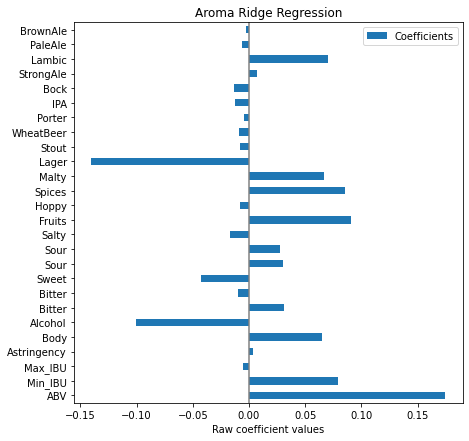

In [131]:
model_aroma = pipeline_rd.fit(x_train,y1_train)

feature_names = model_aroma[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    model_aroma[-1].coef_,
    columns=["Coefficients"],
    index=feature_names,
)

coefs.plot.barh(figsize=(9, 7))
plt.title("Aroma Ridge Regression")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

In [132]:
x =beer[['ABV', 'Min_IBU',
       'Max_IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour',
       'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty' , 'Lager' , 'Stout' ,'WheatBeer',\
        'Porter' , 'IPA' , 'Bock', 'StrongAle' , 'Lambic' , 'PaleAle', 'BrownAle']]
y2 = beer['review_appearance']

x_train, x_test, y2_train, y2_test = train_test_split(x, y2, test_size=0.3, random_state=1)

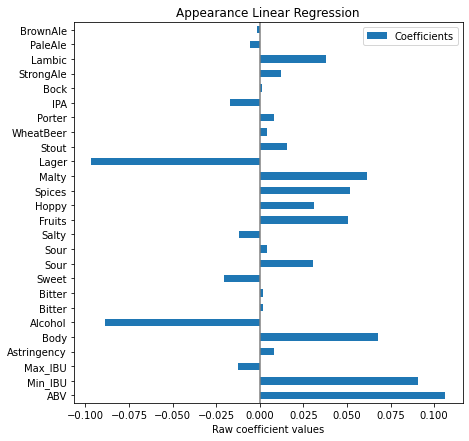

In [133]:
model_appearance = pipeline_ln.fit(x_train,y2_train)

feature_names = model_appearance[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    model_appearance[-1].coef_,
    columns=["Coefficients"],
    index=feature_names,
)

coefs.plot.barh(figsize=(9, 7))
plt.title("Appearance Linear Regression")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

In [134]:
x =beer[['ABV', 'Min_IBU',
       'Max_IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour',
       'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty' , 'Lager' , 'Stout' ,'WheatBeer',\
        'Porter' , 'IPA' , 'Bock', 'StrongAle' , 'Lambic' , 'PaleAle', 'BrownAle']]
y3 = beer['review_palate']

x_train, x_test, y3_train, y3_test = train_test_split(x, y3, test_size=0.3, random_state=1)

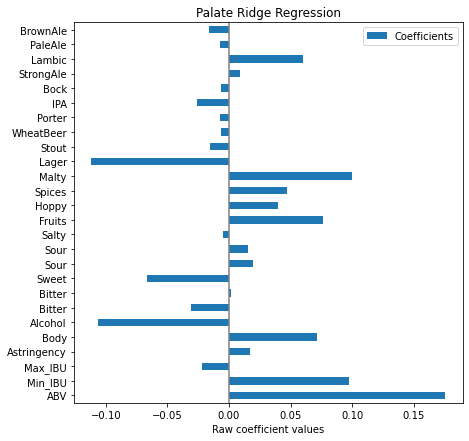

In [150]:
model_palate = pipeline_rd.fit(x_train,y3_train)

feature_names = model_palate[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    model_palate[-1].coef_,
    columns=["Coefficients"],
    index=feature_names,
)

coefs.plot.barh(figsize=(9, 7))
plt.title("Palate Ridge Regression")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

In [136]:
x =beer[['ABV', 'Min_IBU',
       'Max_IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour',
       'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty' , 'Lager' , 'Stout' ,'WheatBeer',\
        'Porter' , 'IPA' , 'Bock', 'StrongAle' , 'Lambic' , 'PaleAle', 'BrownAle']]
y4 = beer['review_taste']

x_train, x_test, y4_train, y4_test = train_test_split(x, y4, test_size=0.3, random_state=1)

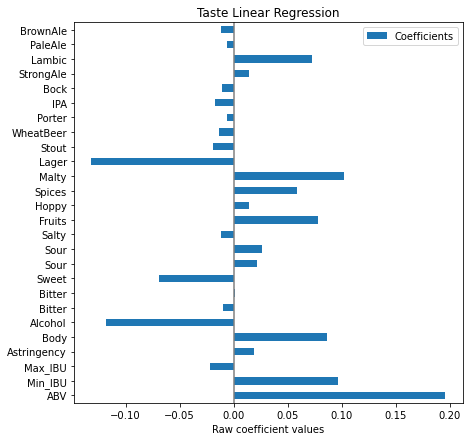

In [137]:
model_taste = pipeline_ln.fit(x_train,y4_train)

feature_names = model_taste[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    model_taste[-1].coef_,
    columns=["Coefficients"],
    index=feature_names,
)

coefs.plot.barh(figsize=(9, 7))
plt.title("Taste Linear Regression")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

In [123]:
#Define Variable + Train Test Split
xx =beer[['review_aroma', 'review_appearance','review_palate','review_taste']]
yy = beer['review_overall']

xx_train, xx_test, yy_train, yy_test = train_test_split(xx, yy, test_size=0.3, random_state=1)

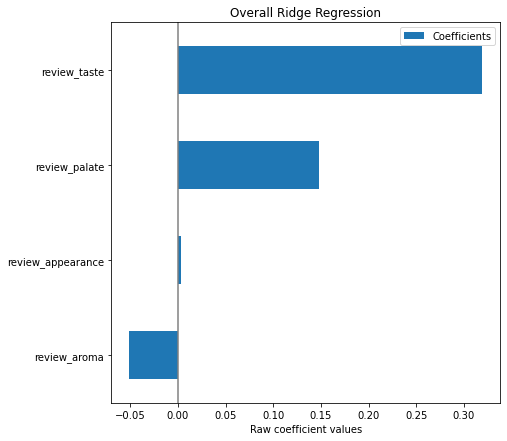

In [124]:
model_overall = pipeline_rd.fit(xx_train,yy_train)

feature_names = model_overall[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    model_overall[-1].coef_,
    columns=["Coefficients"],
    index=feature_names,
)

coefs.plot.barh(figsize=(9, 7))
plt.title("Overall Ridge Regression")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

# 4+1 Model Evaluation

In [138]:
taste_pred = model_taste.predict(x_test)
palate_pred = model_palate.predict(x_test)
appearance_pred = model_appearance.predict(x_test)
aroma_pred = model_aroma.predict(x_test)

In [139]:
x_pred={'review_aroma':aroma_pred, 'review_appearance':appearance_pred, 'review_palate':palate_pred, 'review_taste':taste_pred}
x_pred=pd.DataFrame(data=x_pred)
x_pred

,review_aroma,review_appearance,review_palate,review_taste
0,3.534615,3.634359,3.634359,3.634359
1,3.306372,3.352325,3.352325,3.352325
2,3.703079,3.761415,3.761415,3.761415
3,3.585427,3.618777,3.618777,3.618777
4,4.104706,4.068900,4.068900,4.068900
...,...,...,...,...
955,3.753667,3.802687,3.802687,3.802687
956,4.233484,4.279888,4.279888,4.279888
957,3.859775,3.956525,3.956525,3.956525
958,3.576733,3.665882,3.665882,3.665882


In [140]:
xx_pred = model_overall.predict(x_pred)

In [141]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(xx_pred, yy_test)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.3804399551203283


# Benchmarking with a 1-layer model

In [142]:
#Define Variable + Train Test Split
x =beer[['ABV', 'Min_IBU',
       'Max_IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour',
       'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty' , 'Lager' , 'Stout' ,'WheatBeer',\
        'Porter' , 'IPA' , 'Bock', 'StrongAle' , 'Lambic' , 'PaleAle', 'BrownAle']]
yy = beer['review_overall']

x_train, x_test, yy_train, yy_test = train_test_split(x, yy, test_size=0.3, random_state=1)

In [143]:
pipe_dict = {0: 'Linear regression', 1: 'Lasso regression', 2: 'Ridge regression', 3: 'Elastic Net'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(x_train, yy_train)

In [668]:
for i,model in enumerate(pipelines):
    pred = model.predict(x_test)
    print("{} RMSE: {}".format(pipe_dict[i],mean_squared_error(yy_test,pred, squared=False)))
    print("{} MAE: {}".format(pipe_dict[i],mean_absolute_error(yy_test,pred)))

Linear regression RMSE: 0.3676810057317434
Linear regression MAE: 0.2657790522836721
Lasso regression RMSE: 0.4520122685658794
Lasso regression MAE: 0.32822175367912754
Ridge regression RMSE: 0.3676349465043943
Ridge regression MAE: 0.26577430564982363
Elastic Net RMSE: 0.4520122685658794
Elastic Net MAE: 0.32822175367912754


Ridge is the best

In [145]:
model_overall = pipeline_rd.fit(x_train,yy_train)

In [146]:
x_pred = model_overall.predict(x_test)

In [147]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(x_pred, yy_test)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.3676349465043943


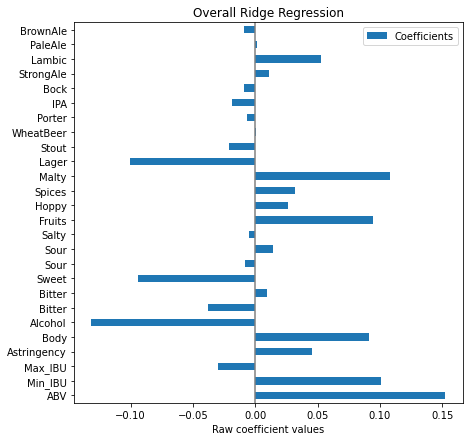

In [148]:
feature_names = model_overall[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    model_overall[-1].coef_,
    columns=["Coefficients"],
    index=feature_names,
)

coefs.plot.barh(figsize=(9, 7))
plt.title("Overall Ridge Regression")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

Our model didn't perform as good as the traditional model
but we have good insights from the building process